In [1]:
# Import lib...
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Machine learning algorithms.
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Descriptive analysis

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data_loading...
# data_view...
dataset_path = "/content/drive/My Drive/Used_car_prediction_project/the_Used_Cars_Pakistan.csv"
df = pd.read_csv(dataset_path)
df.head()

,Unnamed: 0,make,model,city,year,mileage,Engine_displacement,Battery,Price_Rs
0,0,Suzuki,Alto,Lahore,2019,45744,660.0,NaN,3550000
1,1,Suzuki,Wagon,Lahore,2019,17583,660.0,NaN,3850000
2,2,Suzuki,Wagon,Lahore,2019,64085,660.0,NaN,3890000
3,3,Suzuki,Wagon,Lahore,2019,71281,660.0,NaN,3990000
4,4,Toyota,Aqua,Lahore,2020,19950,1500.0,NaN,3990000


In [ ]:
# data_head
df.head(3)

,Unnamed: 0,make,model,city,year,mileage,Engine_displacement,Battery,Price_Rs
0,0,Suzuki,Alto,Lahore,2019,45744,660.0,NaN,3550000
1,1,Suzuki,Wagon,Lahore,2019,17583,660.0,NaN,3850000
2,2,Suzuki,Wagon,Lahore,2019,64085,660.0,NaN,3890000


In [ ]:
# data_tail...
df.tail(3)

,Unnamed: 0,make,model,city,year,mileage,Engine_displacement,Battery,Price_Rs
86117,86117,Suzuki,Bolan,Islamabad,2017,44740,800.0,NaN,1750000
86118,86118,Toyota,Passo,Karachi,2010,94890,1000.0,NaN,2300000
86119,86119,Suzuki,Cultus,Lahore,2008,60800,1000.0,NaN,990000


In [ ]:
# data_shape...
df.shape

(86120, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86120 entries, 0 to 86119
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           86120 non-null  int64  
 1   make                 86120 non-null  object 
 2   model                86120 non-null  object 
 3   city                 86120 non-null  object 
 4   year                 86120 non-null  int64  
 5   mileage              86120 non-null  int64  
 6   Engine_displacement  85931 non-null  float64
 7   Battery              189 non-null    float64
 8   Price_Rs             86120 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,year,mileage,Engine_displacement,Battery,Price_Rs
count,86120.000000,86120.000000,86120.000000,85931.000000,189.000000,8.612000e+04
mean,43059.500000,2012.669995,88789.209963,1388.138146,119.653439,4.173561e+06
std,24860.846928,8.862183,87932.720095,766.087270,207.891986,9.717305e+06
min,0.000000,1944.000000,1.000000,0.000000,3.000000,-2.147484e+09
25%,21529.750000,2007.000000,31000.000000,1000.000000,60.000000,1.500000e+06
50%,43059.500000,2015.000000,78000.000000,1300.000000,80.000000,2.800000e+06
75%,64589.250000,2020.000000,121000.000000,1600.000000,101.000000,4.750000e+06
max,86119.000000,2023.000000,1000000.000000,15000.000000,2000.000000,3.015000e+08


Exploring data analysis

In [4]:
# Exploring data...
avg_price_per_maker = df.groupby("make")["Price_Rs"].mean().sort_values()
top_10_expensive = avg_price_per_maker.tail(10)
top_10_cheap = avg_price_per_maker.head(10)

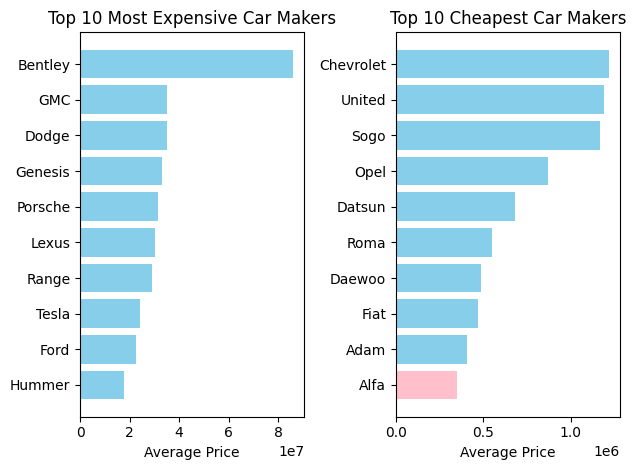

In [5]:
# top 10 most expensive car makers
plt.subplot(1,2,1)
plt.barh(top_10_expensive.index,top_10_expensive,color=["skyblue" if maker != top_10_expensive.idxmax else "pink" for maker in top_10_expensive.index])
plt.title('Top 10 Most Expensive Car Makers')
plt.xlabel('Average Price')

# Top 10 cheapest car makers
plt.subplot(1, 2, 2)
plt.barh(top_10_cheap.index, top_10_cheap, color=['skyblue' if maker != top_10_cheap.idxmin() else 'pink' for maker in top_10_cheap.index])
plt.title('Top 10 Cheapest Car Makers')
plt.xlabel('Average Price')

plt.tight_layout()
plt.show()

Top 5 Popular Brand (pie Chart)

In [6]:
maker_counts = df["make"].value_counts()
top_5_makers = maker_counts.head(5)
others = maker_counts[5:].sum()
top_5_makers["Others"] =others

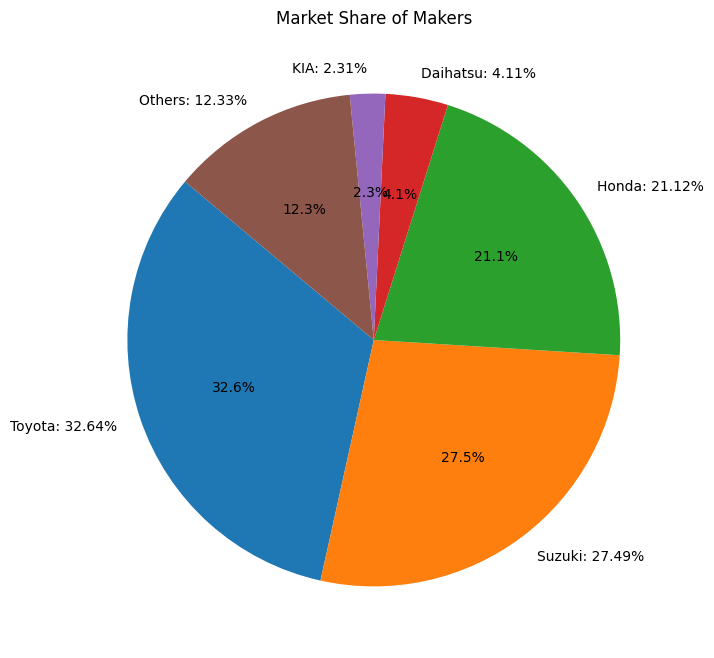

In [7]:
# Market Share
plt.figure(figsize=(8,8))
plt.pie(top_5_makers, labels =[f'{maker}: {percent:.2f}%' for maker, percent in zip(top_5_makers.index, 100* top_5_makers / top_5_makers.sum())], startangle =140, autopct= '%1.1f%%')
plt.title("Market Share of Makers")
plt.show()

correction between "mileage" and "Engine_displacement" by maker

In [ ]:
top_20_makers = df["make"].value_counts().head(20).index
filtered_df = df[df["make"].isin(top_20_makers)]
avg_values = filtered_df.groupby("make").agg({"mileage":"mean","Engine_displacement":"mean"})


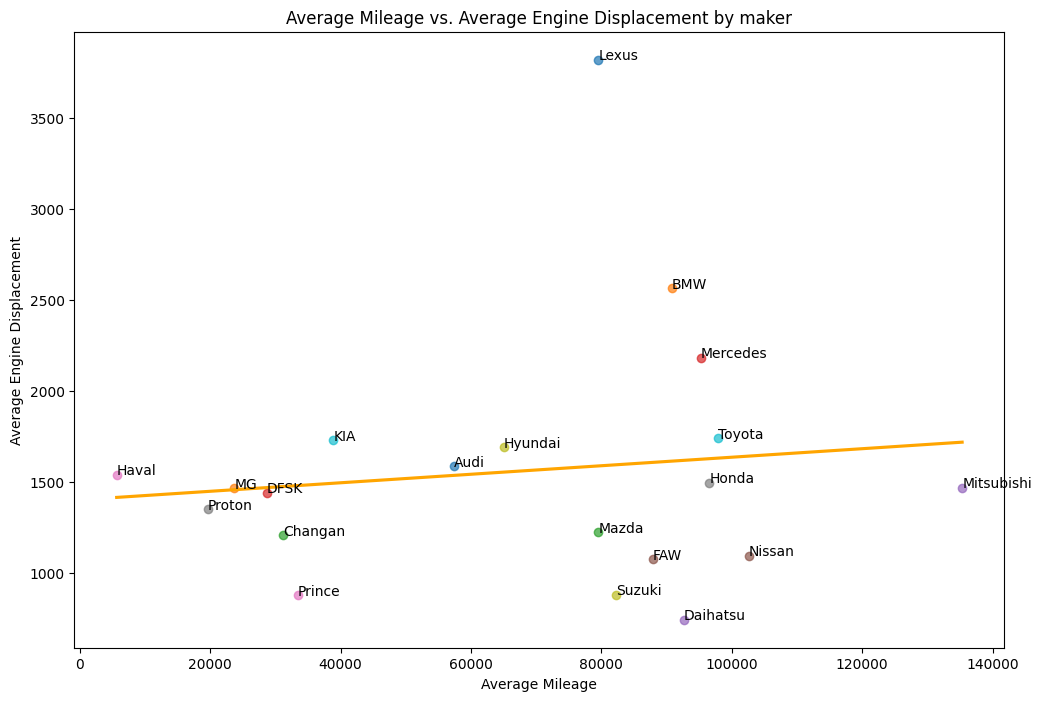

In [ ]:
plt.figure(figsize=(12, 8))
# Create a scatter plot and fit  regression line
sns.regplot(x="mileage",y="Engine_displacement", data= avg_values, fit_reg =True,scatter_kws={"s":100},ci=None,color="orange",scatter = False )
for maker in avg_values.index:
  # select avg data for each maker
  maker_avg = avg_values.loc[maker]
  # Scatter plot for each maker
  plt.scatter(maker_avg["mileage"],maker_avg["Engine_displacement"], alpha=0.7)
  # Annotate each point with the makers name
  plt.text(maker_avg["mileage"],maker_avg["Engine_displacement"],maker)
plt.xlabel("Average Mileage")
plt.ylabel("Average Engine Displacement")
plt.title("Average Mileage vs. Average Engine Displacement by maker")
plt.show()

Null value

In [ ]:
df_na = df.isna().sum().to_frame().reset_index()
df_na.columns = ["Column Name", "Null Count"]
df_na["Null Ratio"] = round((df_na["Null Count"]/ len(df))* 100, 2)
df_na

,Column Name,Null Count,Null Ratio
0,Unnamed: 0,0,0.00
1,make,0,0.00
2,model,0,0.00
3,city,0,0.00
4,year,0,0.00
5,mileage,0,0.00
6,Engine_displacement,189,0.22
7,Battery,85931,99.78
8,Price_Rs,0,0.00


In [ ]:
# drop "Battery" & "Unnamed: 0" columns
df_v1 = df.drop(columns=["Battery","Unnamed: 0"], axis=1)
df_v1.shape
# before removing the columns are(86120,9)

(86120, 7)

In [ ]:
#Drop rows including null values
df_v2 = df_v1.dropna()
df_v2.shape
# before removing the rows are(86120,7)

(85931, 7)

I Add year to make bettermment

In [ ]:
print(max(df_v2["year"]))
df_v2["year2"] = 2023 - df_v2["year"]
df_v2.shape
# (85931, 8) -> from 85931 rows & 7 columns to 85931 rows & 8 columns

2023


<ipython-input-18-299cfc498bdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v2["year2"] = 2023 - df_v2["year"]


(85931, 8)

In [ ]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(['year', 'mileage', 'Engine_displacement', 'Price_Rs']):
    plt.subplot(2, 2, i+1)
    plt.boxplot(df_v2[col])
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Ilogical Numbers - Price_Rs
df_v3 = df_v2[~df_v2["Price_Rs"] <= 0]
df_v3.shape # (85930, 8) -> from 85931 rows & 8 columns to 85930 rows & 8 columns

In [ ]:
# Ilogical Numbers - Engine_displacement
df_v3 = df_v3[~(df_v3["Engine_displacement"] <= 0)]
df_v3.shape # (82937, 8) -> from 85931 rows & 8 columns to 82937 rows & 8 columns

After deleteing all the observations with ilogical numbers, I filtered outliers using IQR.

In [1]:
# IQR function
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2*IQR
    upper_bound = Q3 + 2*IQR
    bound_list = [lower_bound, upper_bound]

    print(f"Lower Bound is {lower_bound} and Upper Bound is {upper_bound}.")

    return bound_list

In [13]:
year2_outlier_list = IQR(df_v3["year2"]) # Lower Bound is -23.0 and Upper Bound is 42.0.
print(len(df_v3[df_v3["year2"] > 42])) # 264 rows
df_v3 = df_v3[~(df_v3["year2"] > 42)]
df_v3.shape # (82673, 8) -> from 82937 rows & 8 columns to 82673 rows & 8 columns

mileage

In [ ]:
mileage_outlier_list = IQR(df_v3["mileage"]) # Lower Bound is -147882.0 and Upper Bound is 299323.0.
print(len(df_v3[df_v3["mileage"] > 299323])) # 1524
df_v3 = df_v3[~(df_v3["mileage"] > 299323)]
df_v3.shape # (81149, 8) -> from 82673 rows & 8 columns to 81149 rows & 8 columns

Lower Bound is -147882.0 and Upper Bound is 299323.0.
1524


(81149, 8)

Engine_displacement

In [ ]:
engine_displacement_outlier_list = IQR(df_v3["Engine_displacement"]) # Lower Bound is -200.0 and Upper Bound is 2800.0.
print(len(df_v3[df_v3["Engine_displacement"] > 2800])) # 3301
print(round((3301 / 81149)*100, 2)) # 4.07
print(max(df_v3["Engine_displacement"])) # 15000

Lower Bound is -200.0 and Upper Bound is 2800.0.
3301
4.07
15000.0


In [ ]:
print(len(df_v3[df_v3["Engine_displacement"] > 6000])) # 69
df_v3 = df_v3[~(df_v3["Engine_displacement"] > 6000)]
df_v3.shape # (81080, 8) -> from 81149 rows & 8 columns to 81080 rows & 8 columns

69


(81080, 8)

Price_Rs

In [ ]:
price_rs_outlier_list = IQR(df_v3["Price_Rs"]) # Lower Bound is -4950000.0 and Upper Bound is 11300000.0.
print(len(df_v3[df_v3["Price_Rs"] > 11300000])) # 3800
print(round((3800 / 81080)*100, 2)) # 4.69

Lower Bound is -4950000.0 and Upper Bound is 11300000.0.
3800
4.69


4.69% is also too high portion to drop. Therefore, I checked the distribution of this column

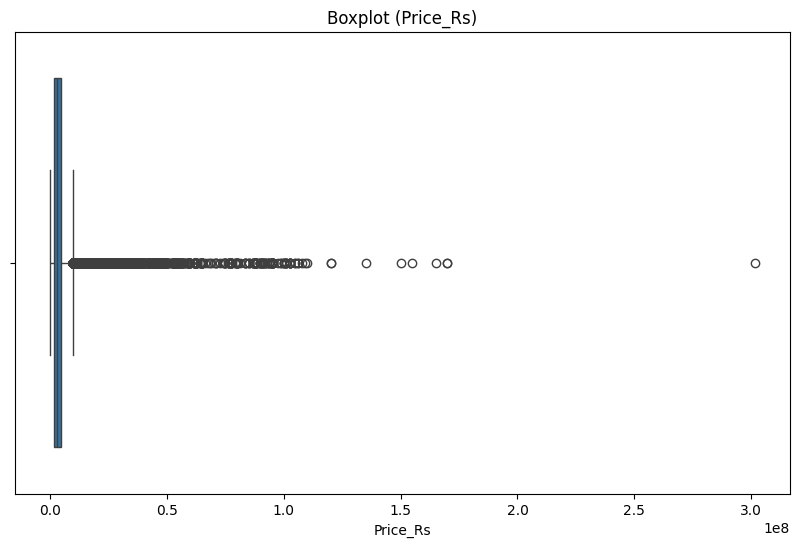

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_v3["Price_Rs"])
plt.title("Boxplot (Price_Rs)")
plt.show()

After reviewing the visualization, I decided to drop the rows with "higher-than-100,000,000-Price_Rs-value.

In [ ]:
print(len(df_v3[df_v3["Price_Rs"] > 100000000])) # 26
df_v3 = df_v3[~(df_v3["Price_Rs"] > 100000000)]
df_v3.shape # (81054, 8) -> from 81080 rows & 8 columns to 81054 rows & 8 columns

df_v4 = df_v3
df_v4.shape # (81054, 8)

26


(81054, 8)

Categorical Variables

In [ ]:
categorical_variables = df_v4.select_dtypes(include=['object']).columns.tolist()
print(categorical_variables) # ['make', 'model', 'city']

['make', 'model', 'city']


make

In [ ]:
print(df_v4["make"].unique())
print(len(df_v4["make"].unique())) # 62

['Suzuki' 'Toyota' 'Daihatsu' 'Mercedes' 'Honda' 'Hyundai' 'Haval' 'KIA'
 'Nissan' 'Changan' 'Mitsubishi' 'Mazda' 'Range' 'Lexus' 'MG' 'Peugeot'
 'MINI' 'DFSK' 'Proton' 'BMW' 'Porsche' 'FAW' 'BAIC' 'Audi' 'Isuzu'
 'Chery' 'United' 'Chevrolet' 'Ford' 'Jeep' 'Subaru' 'Prince' 'Land'
 'Daewoo' 'Volkswagen' 'JAC' 'Hino' 'Buick' 'Dodge' 'Jaguar' 'Volvo'
 'Power' 'Chrysler' 'Sogo' 'Fiat' 'Daehan' 'JW' 'SsangYong' 'Datsun' 'GAC'
 'Austin' 'ZOTYE' 'Master' 'Others' 'Hummer' 'Mushtaq' 'Adam' 'JMC' 'Roma'
 'Classic' 'GMC' 'Alfa']
62


In [ ]:
print(df_v4.groupby("make").size().sort_values().head(30))

make
Alfa           1
Roma           1
Mushtaq        1
GMC            1
GAC            1
Classic        1
Austin         2
Volvo          2
ZOTYE          3
Others         3
Buick          3
Hummer         4
Adam           4
Chrysler       4
JMC            5
Datsun         5
Power          5
Jaguar         6
Dodge          7
Fiat           7
Master         7
Volkswagen     8
MINI           9
JAC            9
Hino          10
SsangYong     14
Daehan        14
JW            15
Sogo          19
Porsche       34
dtype: int64


I dropped the makes with less-than-five-observations.

In [ ]:
make_size = df_v4.groupby("make").size()
make_to_remove = make_size[make_size < 5].index
print(make_to_remove)

Index(['Adam', 'Alfa', 'Austin', 'Buick', 'Chrysler', 'Classic', 'GAC', 'GMC',
       'Hummer', 'Mushtaq', 'Others', 'Roma', 'Volvo', 'ZOTYE'],
      dtype='object', name='make')


In [ ]:
df_v5 = df_v4[~(df_v4["make"].isin(make_to_remove))]
df_v5.shape # (81023, 8) -> from 81054 rows & 8 columns to 81023 rows & 8 columns
print(len(df_v5["make"].unique())) # 62 make -> 48 make

48


model

In [ ]:
print(len(df_v5["model"].unique())) # 395
print(df_v5.groupby("model").size().sort_values().head(100))

395
model
FUSO          1
Altezza       1
Suburban      1
Cappuccino    1
Latio         1
             ..
Beat          2
C37           2
Brz           2
Brio          2
Shahbaz       2
Length: 100, dtype: int64


I dropped the models with less-than-two-observations.

In [ ]:
model_size = df_v5.groupby('model').size()
model_to_remove = model_size[model_size < 2].index
print(model_to_remove)

Index(['1000', '1300', '206', '370Z', '508', 'A7', 'Altezza', 'Amarok',
       'Auris', 'Azwagon', 'Beetle', 'Bezza', 'Bt', 'Cappuccino', 'Caprice',
       'Celsior', 'Cherry', 'Chitral', 'Colorado', 'Cr', 'Cx7', 'Double',
       'FUSO', 'Feroza', 'Frontier', 'Golf', 'Gran', 'Hongqi', 'Ioniq',
       'Jiaxing', 'Kalam', 'Kalash', 'Latio', 'Matiz', 'N-Van', 'Onix', 'Pony',
       'Primera', 'Q5', 'Rio', 'Samurai', 'Sc', 'Senova', 'Suburban', 'Today',
       'Transit', 'UNI-T', 'Verossa', 'Xjs', 'Z', 'Z3'],
      dtype='object', name='model')


In [ ]:
df_v6 = df_v5[~(df_v5["model"].isin(model_to_remove))]
df_v6.shape # (80972, 8) -> from 81054 rows & 8 columns to 80972 rows & 8 columns
print(len(df_v6["model"].unique())) # 376 make -> 344 make

344


In [ ]:
df_v6.shape # (80972, 8)

(80972, 8)

city

In [ ]:
print(len(df_v6["city"].unique())) # 316
print(df_v6.groupby("city").size().sort_values().head(50))

316
city
Kumbh                    1
Gambet                   1
Gakhar mandi             1
Gadoon amazai            1
Lala rukh                1
Lasbela                  1
Ludhan                   1
Sehwan Sharif            1
Makli                    1
Domeli                   1
Dera nawab sahib         1
Naukot                   1
New saeedabad            1
Qazi ahmed               1
Qalandarabad             1
Other                    1
Garh maharaja            1
Bhan saeedabad           1
Noudero                  1
Karoor pacca             1
Khyber                   1
Jatlaan                  1
Jhand                    1
Khanqah sharif           1
Amangarh                 1
Sohawa district daska    1
Kacha khooh              1
Iskandarabad             1
Ali chak                 1
Hattian                  1
Turbat                   1
Klaske                   1
Kamber ali khan          1
Kotli Loharan            2
Nilore                   2
Naseerabad               2
Kandh kot          

I dopped the cities with only one observation.

In [ ]:
city_size = df_v6.groupby("city").size()
city_to_remove = city_size[city_size < 2].index
print(city_to_remove)

Index(['Ali chak', 'Amangarh', 'Bhan saeedabad', 'Dera nawab sahib', 'Domeli',
       'Gadoon amazai', 'Gakhar mandi', 'Gambet', 'Garh maharaja', 'Hattian',
       'Iskandarabad', 'Jatlaan', 'Jhand', 'Kacha khooh', 'Kamber ali khan',
       'Karoor pacca', 'Khanqah sharif', 'Khyber', 'Klaske', 'Kumbh',
       'Lala rukh', 'Lasbela', 'Ludhan', 'Makli', 'Naukot', 'New saeedabad',
       'Noudero', 'Other', 'Qalandarabad', 'Qazi ahmed', 'Sehwan Sharif',
       'Sohawa district daska', 'Turbat'],
      dtype='object', name='city')


In [ ]:
df_v7 = df_v6[~(df_v6["city"].isin(city_to_remove))]
df_v7.shape # (80939, 8) -> from 80972 rows & 8 columns to 80939 rows & 8 columns

(80939, 8)

One-hot Encoing

In [ ]:
one_hot = pd.get_dummies(df_v7, columns=categorical_variables, drop_first=True)
one_hot.shape # (80939, 677)

(80939, 677)

Modeling

Standardization

In [ ]:
X = one_hot.drop(columns = ["year", "Price_Rs"])
y = one_hot["Price_Rs"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

) Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Post-Lasso

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.159e+17, tolerance: 2.092e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [ ]:
coef_used = np.sum(lasso.coef_ != 0)
print(f"Number of features used: {coef_used}")

Number of features used: 672


In [ ]:
X_lasso = X[X.columns[(lasso.coef_ !=0)].to_list()]
X_lasso.shape

(80939, 672)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lasso)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Machine Learning

Random Forest

In [ ]:
# Parameters
param_grid = {'n_estimators': [100, 200, 300]}

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_) # {'n_estimators': 300}

# Best Model
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"R2 Score: {r2}") # R2 Score: 0.8695180956835772
print(f"RMSE: {rmse}") # RMSE: 2120918.5095716747

Best parameters:  {'n_estimators': 300}
R2 Score: 0.8695180956835772
RMSE: 2120918.5095716747
